In [1]:
import tensorflow as tf

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")


2025-02-03 20:04:49.196643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-03 20:04:49.196820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-03 20:04:49.328030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 20:04:49.610699: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-03 20:04:51.609125: W tensorflow/compiler/tf2

57026/57026 [==============================] - 0s 3us/step
Train shape: (404, 13), Test shape: (102, 13)


In [2]:
type(x_train)

numpy.ndarray

In [3]:
from tensorflow.keras import layers, models

# Build a Sequential model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # 13 features in input
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression (single continuous value)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


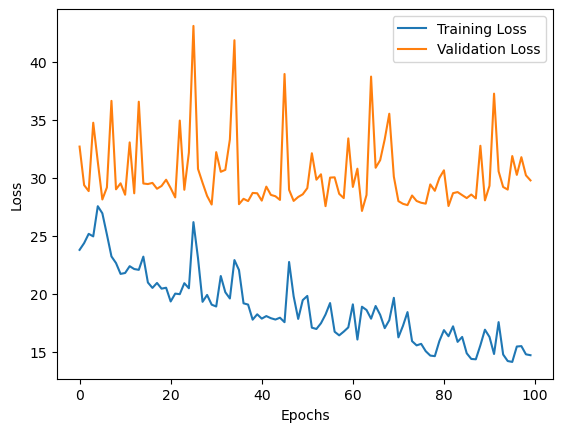

In [5]:
# Fit the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(x_test, y_test))

# Optional: Display the training and validation loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
